# Dataframe analysis

This notebook explores the analysis of the dataframe built from canproco at time point M0. 
It looks at correlation between age, phenotypes, nb of lesions and distribution of lesions. 

Author : Pierre-Louis Benveniste

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import yaml

# Dataframe import

We import the dataframe and exclude the subjects which are in the `exclude.yml` file. 

In [44]:
#load dataframe
dataframe_path = '/Users/plbenveniste/Desktop/test_generate_dataframe/dataframe.csv'
dataframe = pd.read_csv(dataframe_path)

#load exclude.yml file
exclude_path = '/Users/plbenveniste/Documents/NeuroPoly/canproco_project/canproco/exclude.yml'
#exclude_file = pd.read_csv(exclude_path)
with open(exclude_path, 'r') as yaml_file:
    exclude_file = yaml.load(yaml_file, Loader=yaml.FullLoader)

# Subject exclusion

Some subjects were excluded because of poor image quality

In [45]:
#iterate over excluded subjects
for subject in exclude_file:
    #exclude subject from dataframe
    dataframe = dataframe[dataframe.participant_id != subject.split('_')[0]]

#we make sure that participants are only included once
dataframe = dataframe.drop_duplicates(subset=['participant_id'])

# General statistics

Here we compute general statistics about the dataset:
- number of participant
- number of healthy control
- age distribution
- proportion of male/female
- number and proportion per edss/phenotype

In [46]:
#number of participants
nb_participant = len(dataframe.participant_id)
#number of female participants
nb_female = len(dataframe[dataframe.sex == 'F'])
#number of male participants
nb_male = len(dataframe[dataframe.sex == 'M'])
#number of healthy patients
nb_healthy = len(dataframe[dataframe.pathology == 'HC'])
#number of MS patients
nb_MS = len(dataframe[dataframe.pathology == 'MS'])

#now we print them all:
print('Number of participants: ', nb_participant)
print('Number of females: '+ str(nb_female) + " (" + str(round(nb_female/nb_participant*100)) + "%)")
print('Number of females: '+ str(nb_male) + " (" + str(round(nb_male/nb_participant*100)) + "%)\n")
print('Number of healthy participants: '+ str(nb_healthy) + " (" + str(round(nb_healthy/nb_participant*100)) + "%)")
print('Number of MS participants: '+ str(nb_MS) + " (" + str(round(nb_MS/nb_participant*100)) + "%)\n")
print('Age distribution:')
print(dataframe.age.describe())

## Uncomment to see boxplot of age distribution
# #now we can plot the age distribution
# plt.figure(figsize=(3, 5))
# plt.boxplot(dataframe.age)
# plt.title('Age distribution')
# plt.show()

Number of participants:  3
Number of females: 2 (67%)
Number of females: 1 (33%)

Number of healthy participants: 0 (0%)
Number of MS participants: 3 (100%)

Age distribution:
count     3.000000
mean     39.333333
std      13.796135
min      29.000000
25%      31.500000
50%      34.000000
75%      44.500000
max      55.000000
Name: age, dtype: float64


In [47]:
# now we show the distribution of edss scores
print('EDSS distribution:')
print(dataframe.edss.describe())

##Uncomment to see boxplot of edss distribution
# #now we can plot the edss distribution
# plt.figure(figsize=(3, 5))
# plt.boxplot(dataframe.edss)
# plt.title('EDSS distribution')
# plt.show()

EDSS distribution:
count    3.000000
mean     1.166667
std      1.040833
min      0.000000
25%      0.750000
50%      1.500000
75%      1.750000
max      2.000000
Name: edss, dtype: float64


Number of RIS participants: 2 (67%)
Number of RRMS participants: 1 (33%)


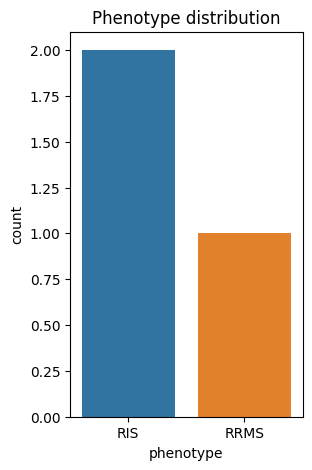

In [48]:
#now we can look at the distribution of phenotypes
phenotypes = dataframe.phenotype.unique()
for phenotype in phenotypes:
    print('Number of ' + phenotype + ' participants: ' + str(len(dataframe[dataframe.phenotype == phenotype])) + " (" + str(round(len(dataframe[dataframe.phenotype == phenotype])/nb_participant*100)) + "%)")

## uncomment to see barplot of phenotypes
#now we can plot the phenotype distribution
plt.figure(figsize=(3, 5))
sns.countplot(x='phenotype', data=dataframe)
plt.title('Phenotype distribution')
plt.show()


# Statistics about lesions 

In this section we describe statistics regarding the MS lesions of the participants: 
- avg number of lesion
- total volume of lesions
- biggest lesion volume
- biggest lesion length
- biggest lesion eq diameter

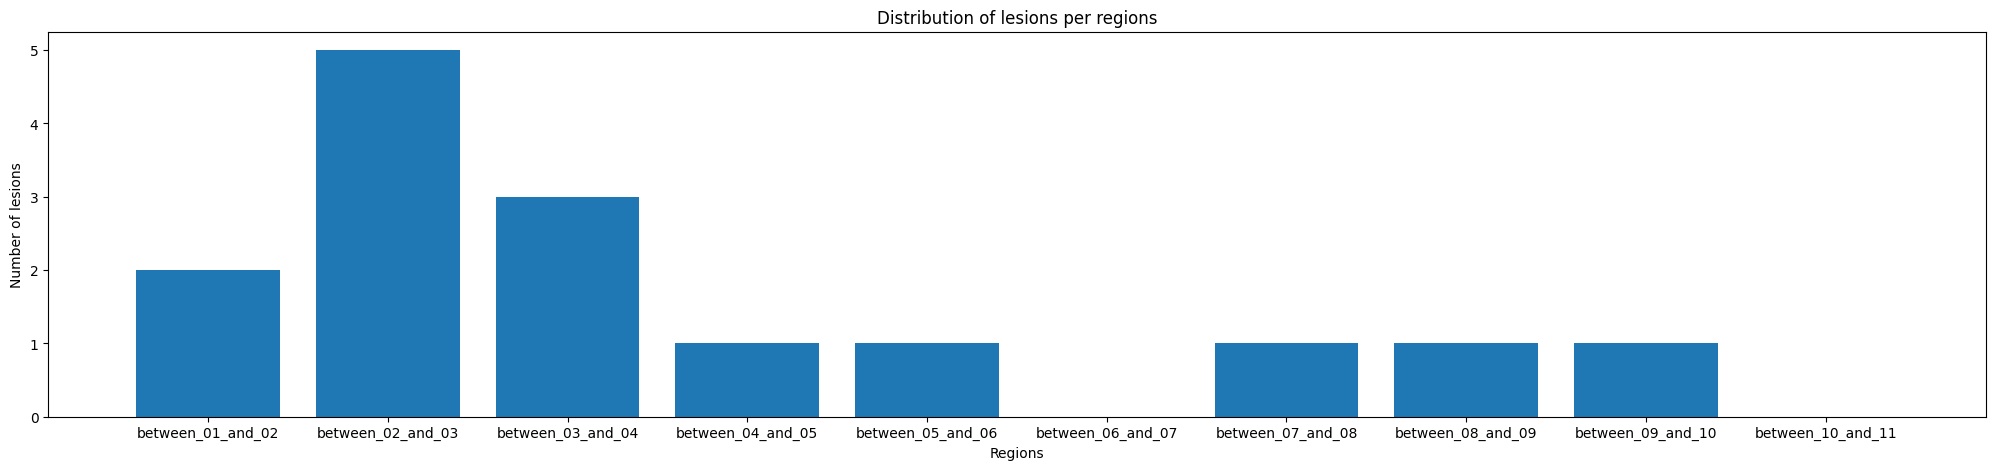

In [49]:
# we get the column names of the dataframe corresponding to the regions
regions = dataframe.columns
regions = [str(column) for column in regions if 'lesions_between' in column]
regions = np.sort(regions)

# we output the hist plot of the distribution of lesions per regions
plt.figure(figsize=(25, 5))
legend = [region.split('_',2)[-1] for region in regions]
plt.bar(legend, dataframe[regions].sum())
plt.title('Distribution of lesions per regions')
plt.xlabel('Regions')
plt.ylabel('Number of lesions')
plt.show()


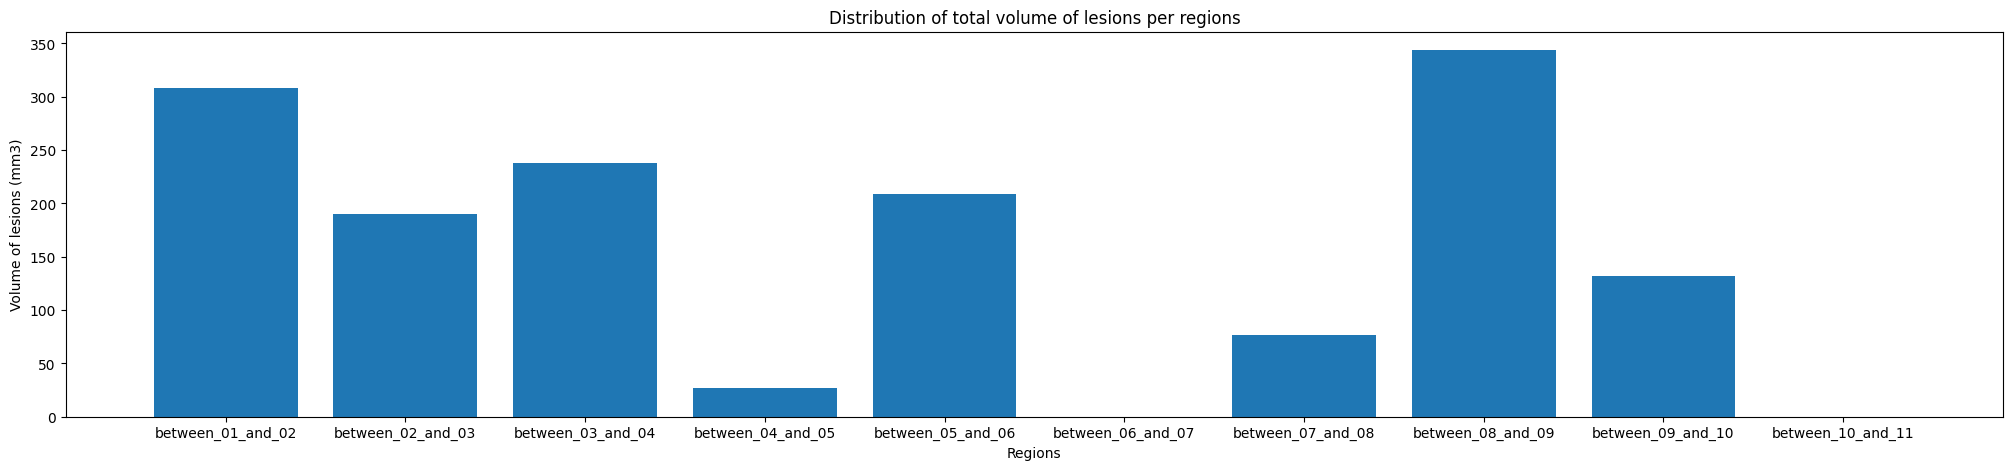

In [50]:
# Now we do the same thing but for the total volume of lesions per regions
regions = dataframe.columns
regions = [str(column) for column in regions if 'total_lesion_volume_between' in column]
regions = np.sort(regions)
# print(regions)

# we output the hist plot of the distribution of volume of lesions per regions
plt.figure(figsize=(25, 5))
legend = [region.split('_',3)[-1] for region in regions]
plt.bar(legend, dataframe[regions].sum())
plt.title('Distribution of total volume of lesions per regions')
plt.xlabel('Regions')
plt.ylabel('Volume of lesions (mm3)')
plt.show()

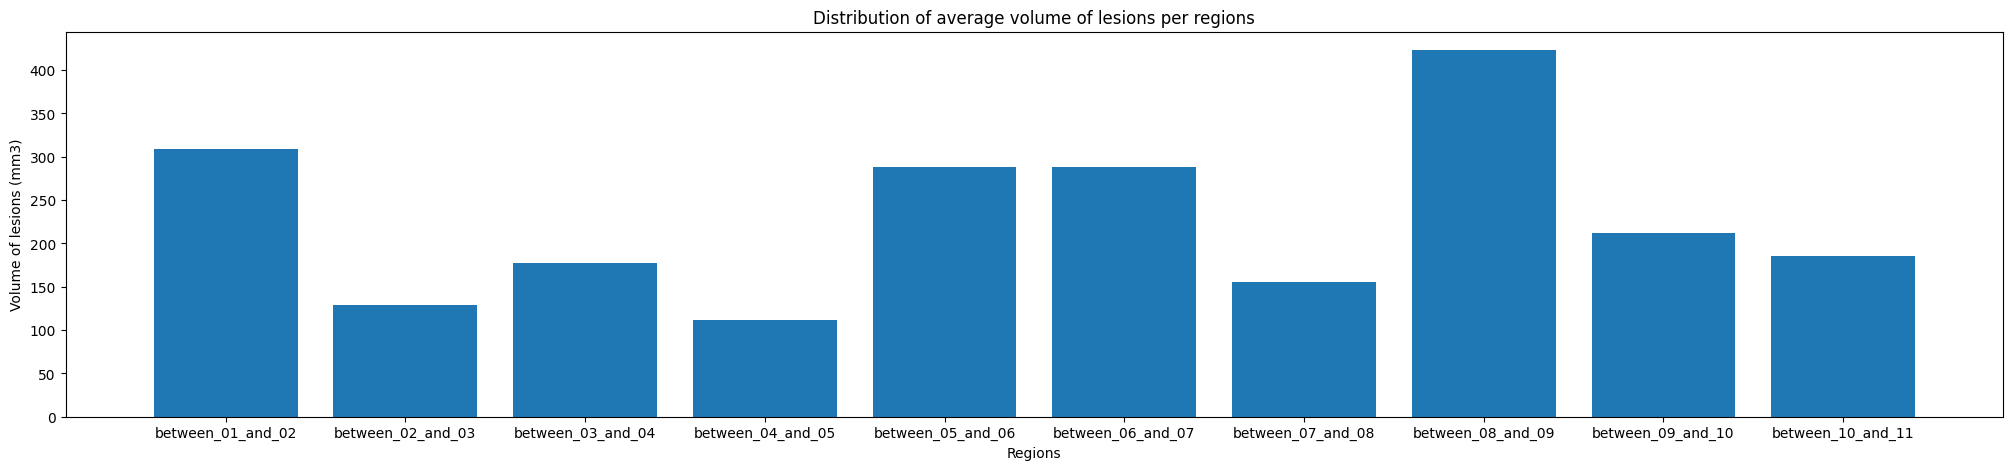

In [51]:
# Now we do the same thing but for the average volume of lesions per regions
regions = dataframe.columns
regions = [str(column) for column in regions if 'avg_lesion_volume_between' in column]
regions = np.sort(regions)
# print(regions)

# we output the hist plot of the distribution of volume of lesions per regions
plt.figure(figsize=(25, 5))
legend = [region.split('_',3)[-1] for region in regions]
plt.bar(legend, dataframe[regions].sum())
plt.title('Distribution of average volume of lesions per regions')
plt.xlabel('Regions')
plt.ylabel('Volume of lesions (mm3)')
plt.show()

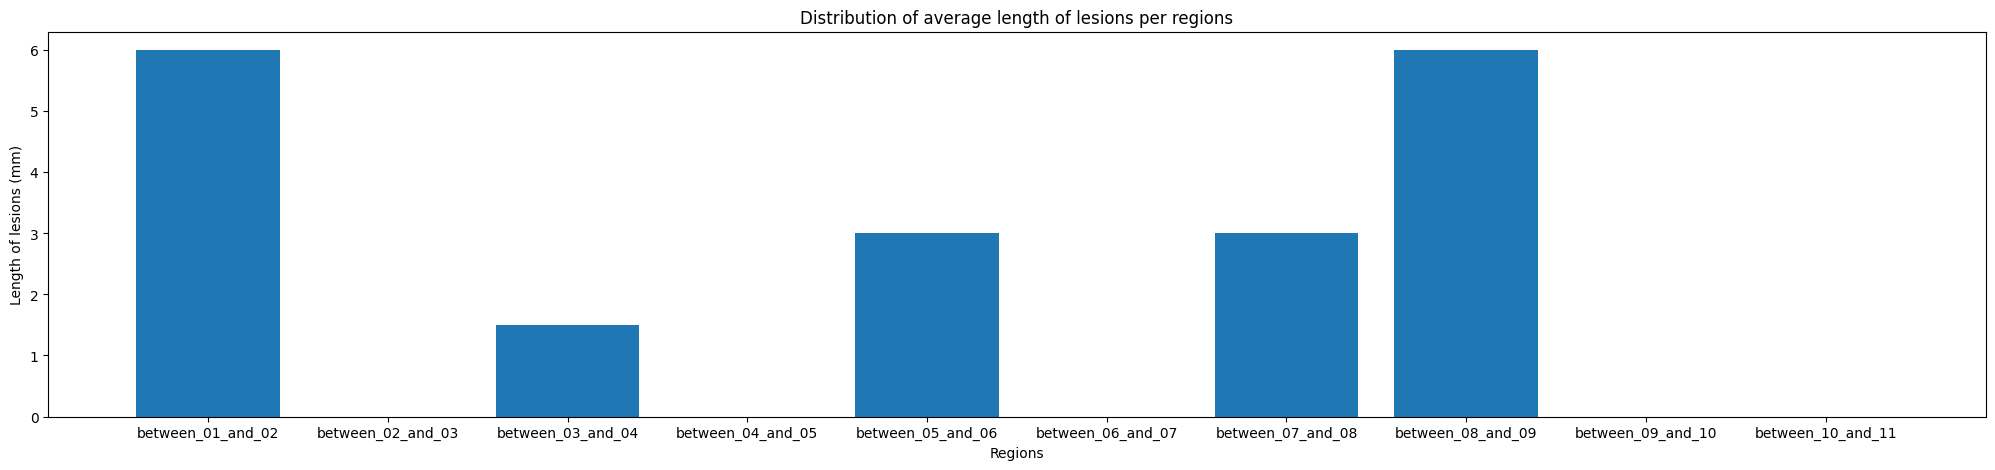

In [52]:
# Now we do the same thing but for the average length of lesions per regions
regions = dataframe.columns
regions = [str(column) for column in regions if 'avg_lesion_length_between' in column]
regions = np.sort(regions)
# print(regions)

# we output the hist plot of the distribution of length of lesions per regions
plt.figure(figsize=(25, 5))
legend = [region.split('_',3)[-1] for region in regions]
plt.bar(legend, dataframe[regions].sum())
plt.title('Distribution of average length of lesions per regions')
plt.xlabel('Regions')
plt.ylabel('Length of lesions (mm)')
plt.show()